In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
data_all = pd.read_csv('Matrix_final_classif.csv')
data_all

,film,Subj,Alpha_Fz,Alpha_F3,Alpha_F7,Alpha_C3,Alpha_T7,Alpha_Pz,Alpha_P3,Alpha_P7,...,sd1,sd2,s,sd1/sd2,breathingrate,EDA,Corr_watch,Corr_Watch-relax,Zygom_watch,Zygom_Watch-relax
0,1.0,1.0,2.526810,1.913928,4.005514,2.027418,4.022892,1.949431,1.321008,1.879488,...,36.004782,63.728486,7208.479428,0.564972,0.126139,1.071543e-05,4.584045e-06,-2.363670e-06,0.000008,1.361368e-06
1,2.0,1.0,2.422609,1.693390,4.184985,1.749329,4.286330,1.903182,1.228613,1.775213,...,32.386361,93.884034,9552.207890,0.344961,0.127548,1.436167e-06,5.025006e-06,-3.596841e-08,0.000008,1.414074e-06
2,3.0,1.0,2.961759,2.105665,4.111915,2.149489,3.840039,2.494217,1.444414,1.953797,...,33.106061,57.626465,5993.484072,0.574494,0.110211,7.873740e-07,5.367433e-06,-1.253883e-06,0.000006,-3.219226e-06
3,4.0,1.0,2.841711,2.009766,4.550318,1.964755,4.471460,2.415181,1.546809,1.995032,...,34.323741,55.708897,6007.158031,0.616127,0.112641,2.621115e-06,5.493949e-06,-5.846554e-07,0.000007,-3.041387e-06
4,5.0,1.0,2.735525,1.719663,4.984611,1.625007,4.578527,1.806550,1.229363,2.054360,...,32.350690,66.163187,6724.342727,0.488953,0.100000,1.977819e-06,6.065049e-06,-5.153287e-07,0.000006,-1.598777e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,5.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.551727,36.532664,1899.654127,0.453067,0.333333,1.586434e-08,4.105661e-07,1.819826e-09,0.000002,-1.218309e-06
162,3.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.091991,59.828525,3024.600108,0.268969,0.300399,1.521037e-07,4.091630e-07,1.107719e-10,0.000002,-3.530825e-07
163,7.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.028114,62.002796,3511.651726,0.290763,0.115463,2.699324e-08,4.106556e-07,4.663283e-10,0.000002,-3.687755e-07
164,6.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.824270,58.258877,2713.221811,0.254455,0.128018,4.118254e-08,4.107057e-07,6.195613e-10,0.000002,-3.542369e-07


In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [7]:
imp = IterativeImputer(max_iter=10, random_state=0)
data_all = pd.DataFrame(imp.fit_transform(data_all),columns=imp.feature_names_in_)
data_all

,film,Subj,Alpha_Fz,Alpha_F3,Alpha_F7,Alpha_C3,Alpha_T7,Alpha_Pz,Alpha_P3,Alpha_P7,...,sd1,sd2,s,sd1/sd2,breathingrate,EDA,Corr_watch,Corr_Watch-relax,Zygom_watch,Zygom_Watch-relax
0,1.0,1.0,2.526810,1.913928,4.005514,2.027418,4.022892,1.949431,1.321008,1.879488,...,36.004782,63.728486,7208.479428,0.564972,0.126139,1.071543e-05,4.584045e-06,-2.363670e-06,0.000008,1.361368e-06
1,2.0,1.0,2.422609,1.693390,4.184985,1.749329,4.286330,1.903182,1.228613,1.775213,...,32.386361,93.884034,9552.207890,0.344961,0.127548,1.436167e-06,5.025006e-06,-3.596841e-08,0.000008,1.414074e-06
2,3.0,1.0,2.961759,2.105665,4.111915,2.149489,3.840039,2.494217,1.444414,1.953797,...,33.106061,57.626465,5993.484072,0.574494,0.110211,7.873740e-07,5.367433e-06,-1.253883e-06,0.000006,-3.219226e-06
3,4.0,1.0,2.841711,2.009766,4.550318,1.964755,4.471460,2.415181,1.546809,1.995032,...,34.323741,55.708897,6007.158031,0.616127,0.112641,2.621115e-06,5.493949e-06,-5.846554e-07,0.000007,-3.041387e-06
4,5.0,1.0,2.735525,1.719663,4.984611,1.625007,4.578527,1.806550,1.229363,2.054360,...,32.350690,66.163187,6724.342727,0.488953,0.100000,1.977819e-06,6.065049e-06,-5.153287e-07,0.000006,-1.598777e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,5.0,21.0,3.111720,3.374355,5.007262,5.014128,5.591337,5.754549,3.445571,4.860382,...,16.551727,36.532664,1899.654127,0.453067,0.333333,1.586434e-08,4.105661e-07,1.819826e-09,0.000002,-1.218309e-06
162,3.0,21.0,3.240271,3.635476,4.996440,4.588444,5.520314,6.326243,3.429652,4.865195,...,16.091991,59.828525,3024.600108,0.268969,0.300399,1.521037e-07,4.091630e-07,1.107719e-10,0.000002,-3.530825e-07
163,7.0,21.0,3.093850,4.080741,5.912176,4.404728,6.177493,7.574871,3.105449,5.374474,...,18.028114,62.002796,3511.651726,0.290763,0.115463,2.699324e-08,4.106556e-07,4.663283e-10,0.000002,-3.687755e-07
164,6.0,21.0,3.059588,3.487503,5.169773,4.656410,5.821828,6.631693,3.546197,5.031374,...,14.824270,58.258877,2713.221811,0.254455,0.128018,4.118254e-08,4.107057e-07,6.195613e-10,0.000002,-3.542369e-07


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier

In [9]:
import shap

In [11]:
data_all['film'] = data_all['film'].apply(lambda x: int(x))
data_all

,film,Subj,Alpha_Fz,Alpha_F3,Alpha_F7,Alpha_C3,Alpha_T7,Alpha_Pz,Alpha_P3,Alpha_P7,...,sd1,sd2,s,sd1/sd2,breathingrate,EDA,Corr_watch,Corr_Watch-relax,Zygom_watch,Zygom_Watch-relax
0,1,1,2.526810,1.913928,4.005514,2.027418,4.022892,1.949431,1.321008,1.879488,...,36.004782,63.728486,7208.479428,0.564972,0.126139,1.071543e-05,4.584045e-06,-2.363670e-06,0.000008,1.361368e-06
1,2,1,2.422609,1.693390,4.184985,1.749329,4.286330,1.903182,1.228613,1.775213,...,32.386361,93.884034,9552.207890,0.344961,0.127548,1.436167e-06,5.025006e-06,-3.596841e-08,0.000008,1.414074e-06
2,3,1,2.961759,2.105665,4.111915,2.149489,3.840039,2.494217,1.444414,1.953797,...,33.106061,57.626465,5993.484072,0.574494,0.110211,7.873740e-07,5.367433e-06,-1.253883e-06,0.000006,-3.219226e-06
3,4,1,2.841711,2.009766,4.550318,1.964755,4.471460,2.415181,1.546809,1.995032,...,34.323741,55.708897,6007.158031,0.616127,0.112641,2.621115e-06,5.493949e-06,-5.846554e-07,0.000007,-3.041387e-06
4,5,1,2.735525,1.719663,4.984611,1.625007,4.578527,1.806550,1.229363,2.054360,...,32.350690,66.163187,6724.342727,0.488953,0.100000,1.977819e-06,6.065049e-06,-5.153287e-07,0.000006,-1.598777e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,5,21,3.111720,3.374355,5.007262,5.014128,5.591337,5.754549,3.445571,4.860382,...,16.551727,36.532664,1899.654127,0.453067,0.333333,1.586434e-08,4.105661e-07,1.819826e-09,0.000002,-1.218309e-06
162,3,21,3.240271,3.635476,4.996440,4.588444,5.520314,6.326243,3.429652,4.865195,...,16.091991,59.828525,3024.600108,0.268969,0.300399,1.521037e-07,4.091630e-07,1.107719e-10,0.000002,-3.530825e-07
163,7,21,3.093850,4.080741,5.912176,4.404728,6.177493,7.574871,3.105449,5.374474,...,18.028114,62.002796,3511.651726,0.290763,0.115463,2.699324e-08,4.106556e-07,4.663283e-10,0.000002,-3.687755e-07
164,6,21,3.059588,3.487503,5.169773,4.656410,5.821828,6.631693,3.546197,5.031374,...,14.824270,58.258877,2713.221811,0.254455,0.128018,4.118254e-08,4.107057e-07,6.195613e-10,0.000002,-3.542369e-07


In [16]:
%matplotlib inline

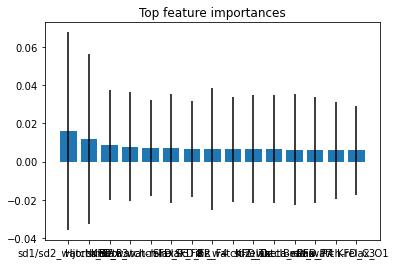

1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 0.0
1.0 1.0
0.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
0.0 1.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
------------------------------------------------
0.5238095238095238
0.5833333333333334
0.5666666666666668


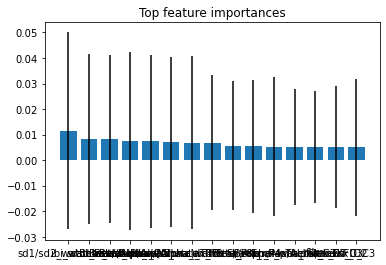

1.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 0.0
1.0 1.0
------------------------------------------------
0.7
0.6666666666666666
0.696969696969697


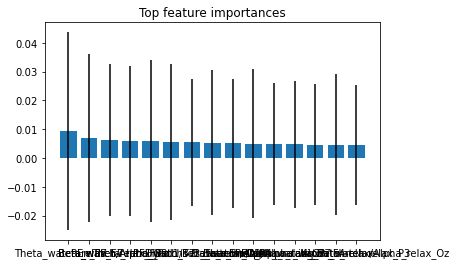

0.0 1.0
0.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
1.0 0.0
0.0 1.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 0.0
1.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
------------------------------------------------
0.5238095238095238
0.375
0.6102941176470589


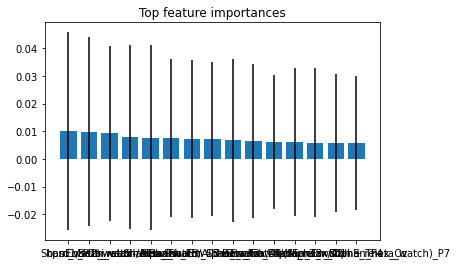

0.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
1.0 0.0
0.0 1.0
1.0 0.0
0.0 1.0
0.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
------------------------------------------------
0.5238095238095238
0.6153846153846153
0.5


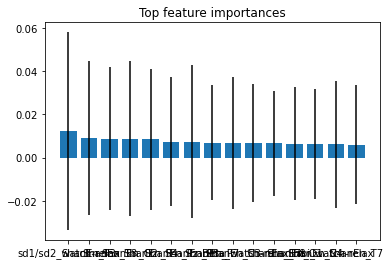

1.0 1.0
0.0 1.0
1.0 1.0
0.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
1.0 1.0
0.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
1.0 1.0
1.0 1.0
------------------------------------------------
0.5714285714285714
0.7272727272727273
0.5


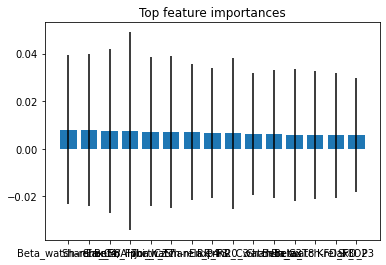

1.0 0.0
0.0 1.0
1.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
------------------------------------------------
0.7
0.5714285714285715
0.6666666666666666


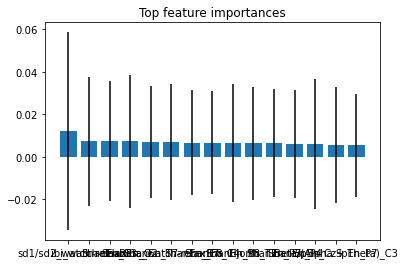

0.0 0.0
0.0 0.0
1.0 0.0
0.0 1.0
1.0 0.0
0.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
0.0 0.0
1.0 0.0
0.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
------------------------------------------------
0.5714285714285714
0.608695652173913
0.5817307692307692


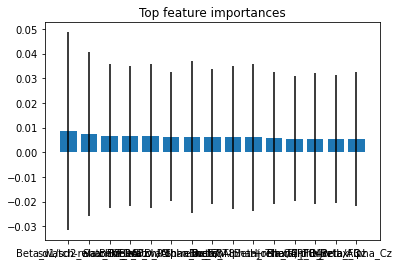

1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 1.0
1.0 0.0
1.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
1.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
------------------------------------------------
0.6190476190476191
0.5555555555555556
0.6201923076923077


In [25]:
result = pd.DataFrame()
grid_res = []
TOP_FEATURES = 15
n_films = 8
n_subjects = 21
sr = []
for film in range(1, n_films + 1):
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)

    y_train = X_train['Labels']
    y_test = np.array(X_test['Labels'])
    train_film = X_train['film']
    train_subj = X_train['Subj']
    #train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    #test_ch = np.array(X_test['ch'])
    X_train = X_train.drop(['Subj',  'Labels'], axis=1)
    X_test = X_test.drop(['Subj', 'Labels'], axis=1)
    forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
    forest.fit(X_train, y_train)

    importances = forest.feature_importances_
    std = np.std(
        [tree.feature_importances_ for tree in forest.estimators_],
        axis=0
    )
    cols = X_train.columns
    indices = np.argsort(importances)[::-1]
    indices = indices[:TOP_FEATURES]
    plt.figure()
    columns = [cols[f] for f in indices[0:TOP_FEATURES]]
    plt.title('Top feature importances')
    plt.bar(
        range(TOP_FEATURES), 
        importances[indices],
        yerr=std[indices],
    )
    plt.xticks(range(TOP_FEATURES), columns)
    plt.show()

    if not 'film' in columns:
        columns += ['film']
    #if not 'Subj' in columns:
    #    columns += ['Subj']
    X_train = X_train[columns]
    X_test = X_test[columns]
    pipeline = CatBoostClassifier(verbose=False)
    pipeline.fit(X_train, y_train, cat_features=['film'])
    #explainer = shap.TreeExplainer(pipeline)
    #shap_values = explainer.shap_values(X)
    #shap.summary_plot(shap_values, X)
    preds = pipeline.predict(X_test)
    for [l, p] in zip(y_test, preds):
        print(l, p)
    print('------------------------------------------------')
    df = {
        'Accuracy' : float("{:.2f}".format(accuracy_score(y_test, preds))),
        'F1' : float("{:.2f}".format(f1_score(y_test, preds))),
        'ROC_AUC' : float("{:.2f}".format(roc_auc_score(y_test, preds)))
        #'y_true' : float("{:.2f}".format(np.mean(y_test))),
        #'y_pred' : float("{:.2f}".format(np.mean(preds)))
    }
    result = pd.concat([result, pd.DataFrame(df, index=[film])])
    print(accuracy_score(y_test, preds))
    print(f1_score(y_test, preds))
    print(roc_auc_score(y_test, preds))

In [26]:
result

,Accuracy,F1,ROC_AUC
1,0.52,0.58,0.57
2,0.70,0.67,0.70
3,0.52,0.38,0.61
4,0.52,0.62,0.50
5,0.57,0.73,0.50
6,0.70,0.57,0.67
7,0.57,0.61,0.58
8,0.62,0.56,0.62


In [27]:
result.describe()

,Accuracy,F1,ROC_AUC
count,8.000000,8.00000,8.000000
mean,0.590000,0.59000,0.593750
std,0.076158,0.10198,0.072099
min,0.520000,0.38000,0.500000
25%,0.520000,0.56750,0.552500
50%,0.570000,0.59500,0.595000
75%,0.640000,0.63250,0.632500
max,0.700000,0.73000,0.700000


In [28]:
result.to_excel('NeurotechX_best_results2.xlsx')

In [29]:
result.describe().to_excel('NeurotechX_best_results2_d.xlsx')

In [32]:
list(X_train.columns)

['Alpha_Fz',
 'Alpha_F3',
 'Alpha_F7',
 'Alpha_C3',
 'Alpha_T7',
 'Alpha_Pz',
 'Alpha_P3',
 'Alpha_P7',
 'Alpha_O1',
 'Alpha_Oz',
 'Alpha_O2',
 'Alpha_P4',
 'Alpha_P8',
 'Alpha_Cz',
 'Alpha_C4',
 'Alpha_T8',
 'Alpha_F4',
 'Alpha_F8',
 'Alpha_ratio_Fz',
 'Alpha_ratio_F3',
 'Alpha_ratio_F7',
 'Alpha_ratio_C3',
 'Alpha_ratio_T7',
 'Alpha_ratio_Pz',
 'Alpha_ratio_P3',
 'Alpha_ratio_P7',
 'Alpha_ratio_O1',
 'Alpha_ratio_Oz',
 'Alpha_ratio_O2',
 'Alpha_ratio_P4',
 'Alpha_ratio_P8',
 'Alpha_ratio_Cz',
 'Alpha_ratio_C4',
 'Alpha_ratio_T8',
 'Alpha_ratio_F4',
 'Alpha_ratio_F8',
 'Alpha_watch-relax_Fz',
 'Alpha_watch-relax_F3',
 'Alpha_watch-relax_F7',
 'Alpha_watch-relax_C3',
 'Alpha_watch-relax_T7',
 'Alpha_watch-relax_Pz',
 'Alpha_watch-relax_P3',
 'Alpha_watch-relax_P7',
 'Alpha_watch-relax_O1',
 'Alpha_watch-relax_Oz',
 'Alpha_watch-relax_O2',
 'Alpha_watch-relax_P4',
 'Alpha_watch-relax_P8',
 'Alpha_watch-relax_Cz',
 'Alpha_watch-relax_C4',
 'Alpha_watch-relax_T8',
 'Alpha_watch-relax_F4',

In [87]:
 from sklearn.tree import DecisionTreeClassifier

In [112]:
result = pd.DataFrame()
grid_res = []
n_films = 8
n_subjects = 21
sr = []
for film in range(1, n_films + 1):
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)

    y_train = X_train['Labels']
    y_test = np.array(X_test['Labels'])
    train_film = X_train['film']
    train_subj = X_train['Subj']
    #train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    #test_ch = np.array(X_test['ch'])
    X_train = X_train.drop(['Subj', 'film', 'Labels'], axis=1)
    X_test = X_test.drop(['Subj', 'film', 'Labels'], axis=1)
    forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
    forest.fit(X_train, y_train)

    importances = forest.feature_importances_
    std = np.std(
        [tree.feature_importances_ for tree in forest.estimators_],
        axis=0
    )
    indices = np.argsort(importances)[::-1]
    indices = indices[:TOP_FEATURES]
    cols = X_train.columns
    X_train = X_train[[cols[f] for f in indices[0:15]]]
    X_test = X_test[[cols[f] for f in indices[0:15]]]
    pipeline = GaussianNB()
    pipeline.fit(X_train, y_train)
    #m = LogisticRegression(
    #    penalty='l2',
    #    C=0.001
    #)
    #m.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    for [l, p] in zip(y_test, preds):
        print(l, p)
    print('------------------------------------------------')
    df = {
        'Accuracy' : float("{:.2f}".format(accuracy_score(y_test, preds))),
        'F1' : float("{:.2f}".format(f1_score(y_test, preds))),
        'ROC_AUC' : float("{:.2f}".format(roc_auc_score(y_test, preds)))
        #'y_true' : float("{:.2f}".format(np.mean(y_test))),
        #'y_pred' : float("{:.2f}".format(np.mean(preds)))
    }
    result = pd.concat([result, pd.DataFrame(df, index=[film])])
    print(accuracy_score(y_test, preds))
    print(f1_score(y_test, preds))
    print(roc_auc_score(y_test, preds))

1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
0.0 1.0
1.0 0.0
1.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
0.0 1.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
------------------------------------------------
0.38095238095238093
0.3809523809523809
0.46666666666666673
1.0 1.0
1.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
1.0 1.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
1.0 1.0
------------------------------------------------
0.55
0.47058823529411764
0.5404040404040403
0.0 0.0
0.0 1.0
1.0 1.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 1.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
------------------------------------------------
0.5238095238095238
0.16666666666666666
0.41911764705882354
0.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
1.0 0.0
0.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 1.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
---------------------------

In [113]:
result

,Accuracy,F1,ROC_AUC
1,0.38,0.38,0.47
2,0.55,0.47,0.54
3,0.52,0.17,0.42
4,0.43,0.33,0.46
5,0.48,0.65,0.42
6,0.60,0.33,0.54
7,0.38,0.13,0.48
8,0.76,0.71,0.76


In [114]:
result.describe()

,Accuracy,F1,ROC_AUC
count,8.000000,8.000000,8.00000
mean,0.512500,0.396250,0.51125
std,0.127251,0.206808,0.11051
min,0.380000,0.130000,0.42000
25%,0.417500,0.290000,0.45000
50%,0.500000,0.355000,0.47500
75%,0.562500,0.515000,0.54000
max,0.760000,0.710000,0.76000
